In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Drop irrelevant or high-missing columns
df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0] )

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

 

In [25]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # 1.2 Train Decision Tree Model

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))


Training Accuracy: 0.9789325842696629
Testing Accuracy: 0.7653631284916201


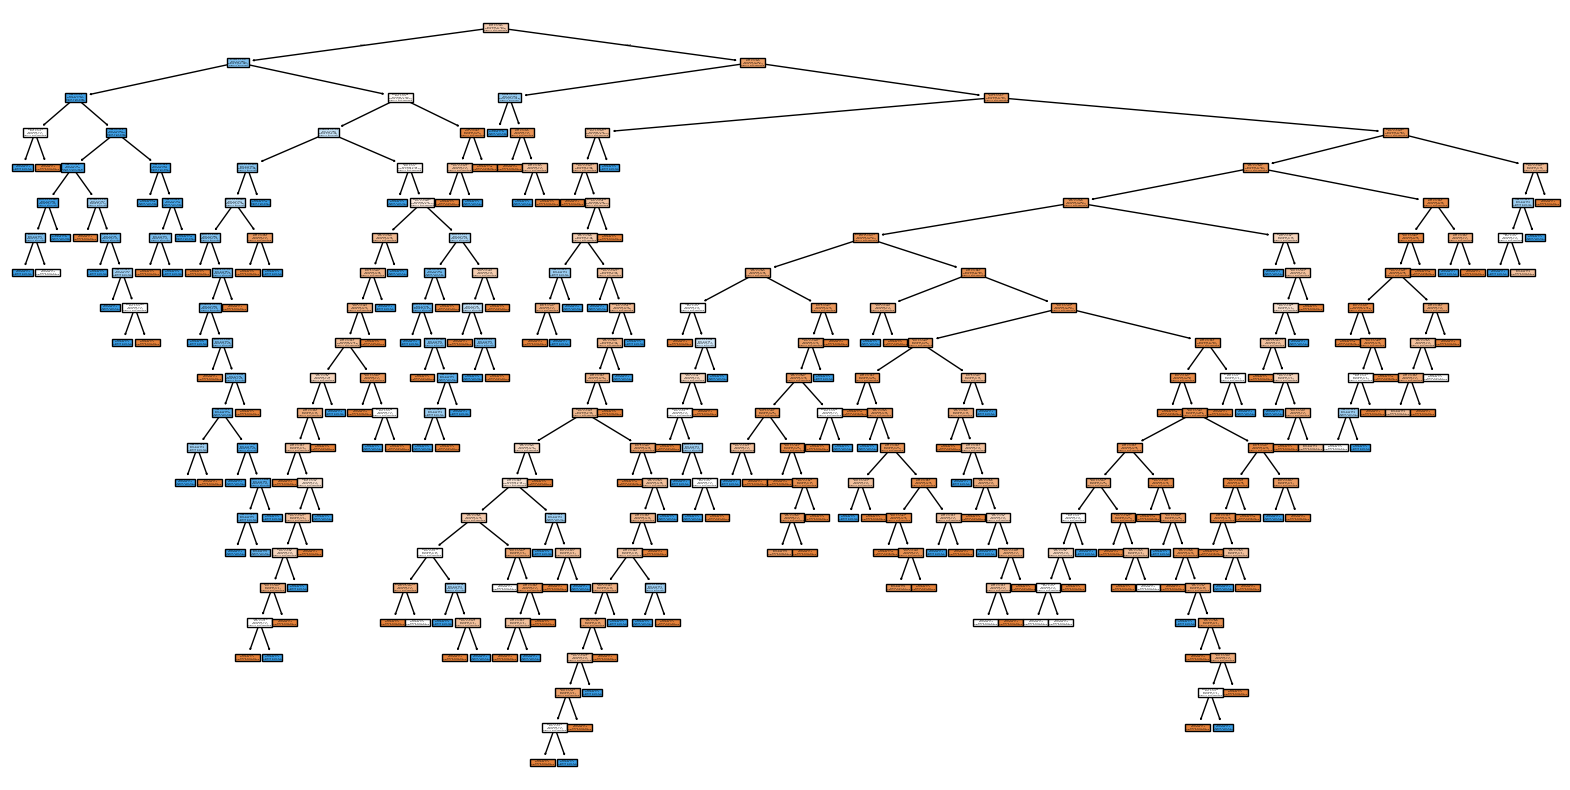

In [30]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.show()


# Task 2: Effect of max_depth

 ### 2.1 Train Models with Varying Depths

In [36]:
depths = [2, 3, 5, None]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"max_depth={depth}, Test Accuracy={test_acc}")


max_depth=2, Test Accuracy=0.7653631284916201
max_depth=3, Test Accuracy=0.7988826815642458
max_depth=5, Test Accuracy=0.7988826815642458
max_depth=None, Test Accuracy=0.7821229050279329


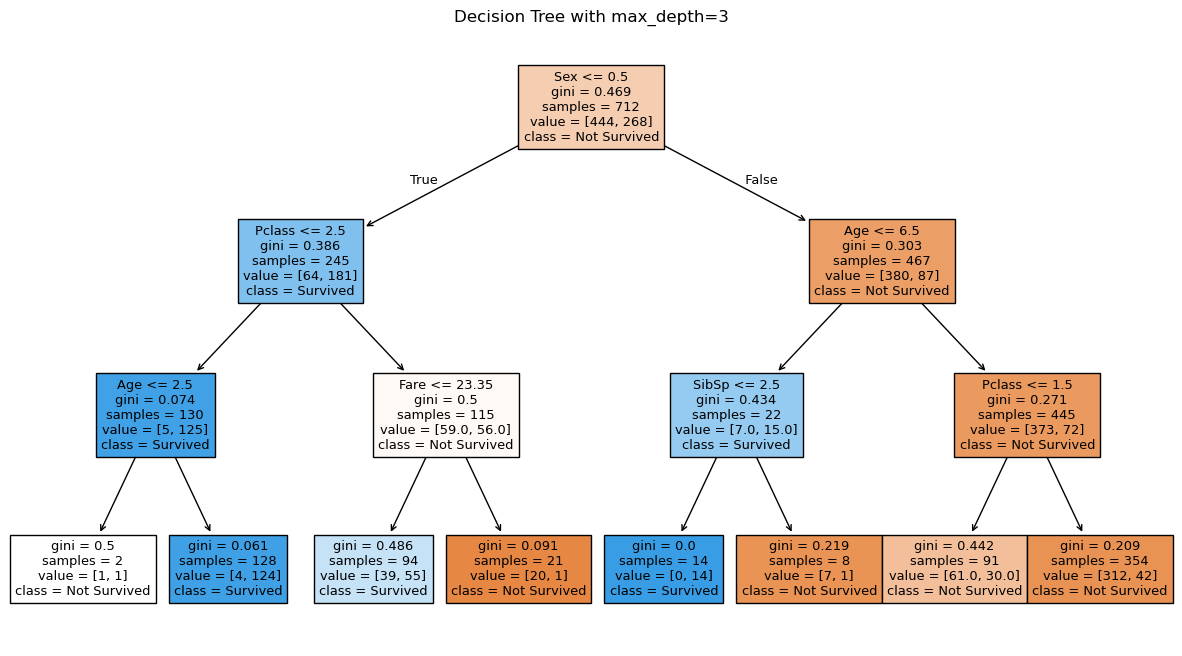

In [38]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree with max_depth=3")
plt.show()
